In [1]:
import pandas as pd
from scipy import cluster
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

asset_returns = pd.read_csv("../PythonProject1/data/returns.csv")
asset_returns.drop(columns=["Open time"], inplace=True)
assets = asset_returns.columns

# Compute correlation matrix
correlation_matrix = asset_returns.corr()

# Convert correlation matrix to distance
distance_matrix = 1 - correlation_matrix.abs()

# Apply clustering
linkage_matrix = linkage(squareform(distance_matrix), method="ward")
clusters = fcluster(linkage_matrix, t=250, criterion="maxclust")  # Define number of clusters

# Group assets into clusters
asset_clusters = {f"cluster_{i.item()}": [] for i in set(clusters)}
for asset, i in zip(assets, clusters):
    asset_clusters[f"cluster_{i.item()}"].append(asset)

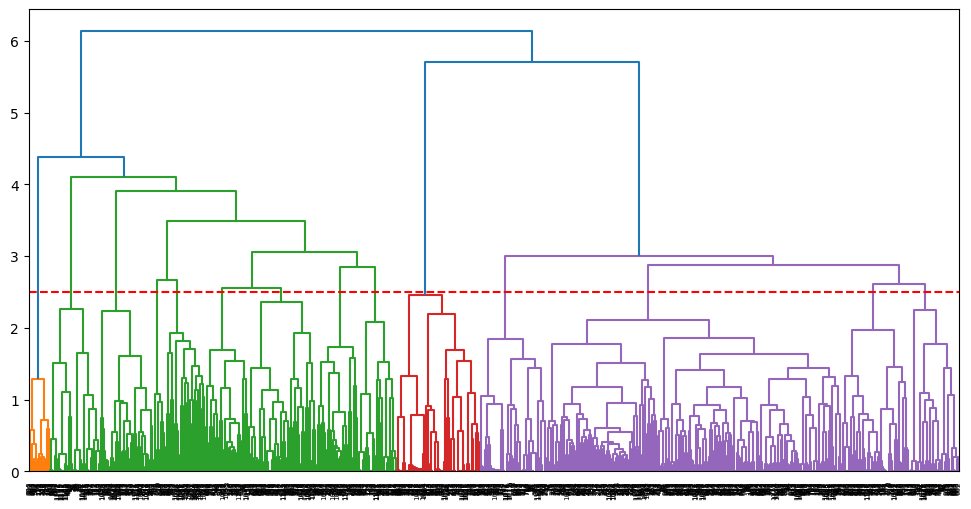

In [2]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
threshold = 2.5
dendrogram(linkage_matrix)
plt.axhline(y=threshold, color="r", linestyle="--")  # Choose a threshold visually
plt.show()

In [18]:
from binance_usage import fetch_historical_data, calculate_yearly_liquidity_score
from binance.client import Client
API_KEY = ""
API_SECRET = ""

client = Client(API_KEY, API_SECRET)
start_date = "2020-01-01"

In [20]:
from tqdm import tqdm
final_assets = []
for cluster in tqdm(asset_clusters):
	max_liquidity_score = 0
	most_liquid_asset = asset_clusters[cluster][0]
	for asset in asset_clusters[cluster]:
		liquidity_score = calculate_yearly_liquidity_score(client, asset, '1d', start_date)
		if liquidity_score > max_liquidity_score:
			most_liquid_asset = asset
			max_liquidity_score = liquidity_score
	final_assets.append(most_liquid_asset)

100%|██████████| 250/250 [15:13<00:00,  3.66s/it]


In [21]:
final_assets

['OGBTC',
 'SANTOSBTC',
 'ASRUSDT',
 'PSGUSDT',
 'BARUSDT',
 'LTCBTC',
 'XRPBTC',
 'HBARBTC',
 'ALGOBTC',
 'ADABTC',
 'XLMBTC',
 'DOTBTC',
 'ATOMBTC',
 'BNBBTC',
 'TRXBTC',
 'WINTRX',
 'VETBTC',
 'DENTETH',
 'DASHBTC',
 'EOSBTC',
 'BATBTC',
 'IOTABTC',
 'XVGETH',
 'DGBUSDT',
 'ONGBTC',
 'WINBNB',
 'GASBTC',
 'DEGOUSDT',
 'OMBTC',
 'ACABTC',
 'MDTBTC',
 'GLMRBTC',
 'KMDBTC',
 'RENBTC',
 'OAXBTC',
 'PAXGUSDT',
 'ELFBTC',
 'EURUSDT',
 'USDTRON',
 'USDTCZK',
 'VICBTC',
 'TUSDUSDT',
 'USDTARS',
 'VITEBTC',
 'CLVBTC',
 'HARDUSDT',
 'WBTCBTC',
 'CKBUSDT',
 'USDTBRL',
 'USDTMXN',
 'TWTBTC',
 'USDTCOP',
 'USDTZAR',
 'QKCBTC',
 'SHIBDOGE',
 'EURAEUR',
 'WBETHETH',
 'USDTUAH',
 'TKOBTC',
 'CVCUSDT',
 'USDPUSDT',
 'MOVRBTC',
 'KDABTC',
 'ACHBTC',
 'RLCBTC',
 'ANKRBTC',
 'STGBTC',
 'NEXOBTC',
 'FISBTC',
 'REQBTC',
 'ZILBTC',
 'SFPBTC',
 'ADXBTC',
 'BNXBTC',
 'VIDTBTC',
 'AXSBTC',
 'MANABTC',
 'LTOBTC',
 'TFUELBTC',
 'GALABTC',
 'FILBTC',
 'CHZBTC',
 'ENJBTC',
 'TLMBTC',
 'SLPETH',
 'PROMUSDT',
 'QN